In [1]:
import torch
from torchvision import datasets, transforms
from torchvision.transforms import functional as F
import numpy as np
import random
from PIL import Image, ImageFilter





In [2]:
transform = transforms.ToTensor()
cifar10 = datasets.CIFAR10(root='./cifar-10', train=False, download=True, transform=transform)
data_loader = torch.utils.data.DataLoader(cifar10, batch_size=100, shuffle=False)
data_iter = iter(data_loader)
images, labels = next(data_iter)  


Files already downloaded and verified


In [3]:
def apply_blur(image):
    pil_image = F.to_pil_image(image)
    blurred_image = pil_image.filter(ImageFilter.GaussianBlur(radius=1.5))
    return F.to_tensor(blurred_image)

In [4]:
def apply_random_mask(image, mask_ratio=0.25):
    # np_image = np.array(F.to_pil_image(image))  # 转为 NumPy 格式
    total_pixels = image.shape[1] * image.shape[2]
    num_masked = int(total_pixels * mask_ratio)
    mask_indices = random.sample(range(total_pixels), num_masked)
    
    x = [mask_indice//image.shape[1] for mask_indice in mask_indices]
    y = [mask_indice%image.shape[1] for mask_indice in mask_indices]
    mask = torch.ones(image.shape)
    mask[:,x,y] = 0
    
    return image*mask

In [5]:
processed_images = []
for idx, image in enumerate(images):
    if idx % 2 == 0: 
        processed_image = apply_random_mask(image)
    else: 
        processed_image = apply_blur(image)
    processed_images.append(processed_image)

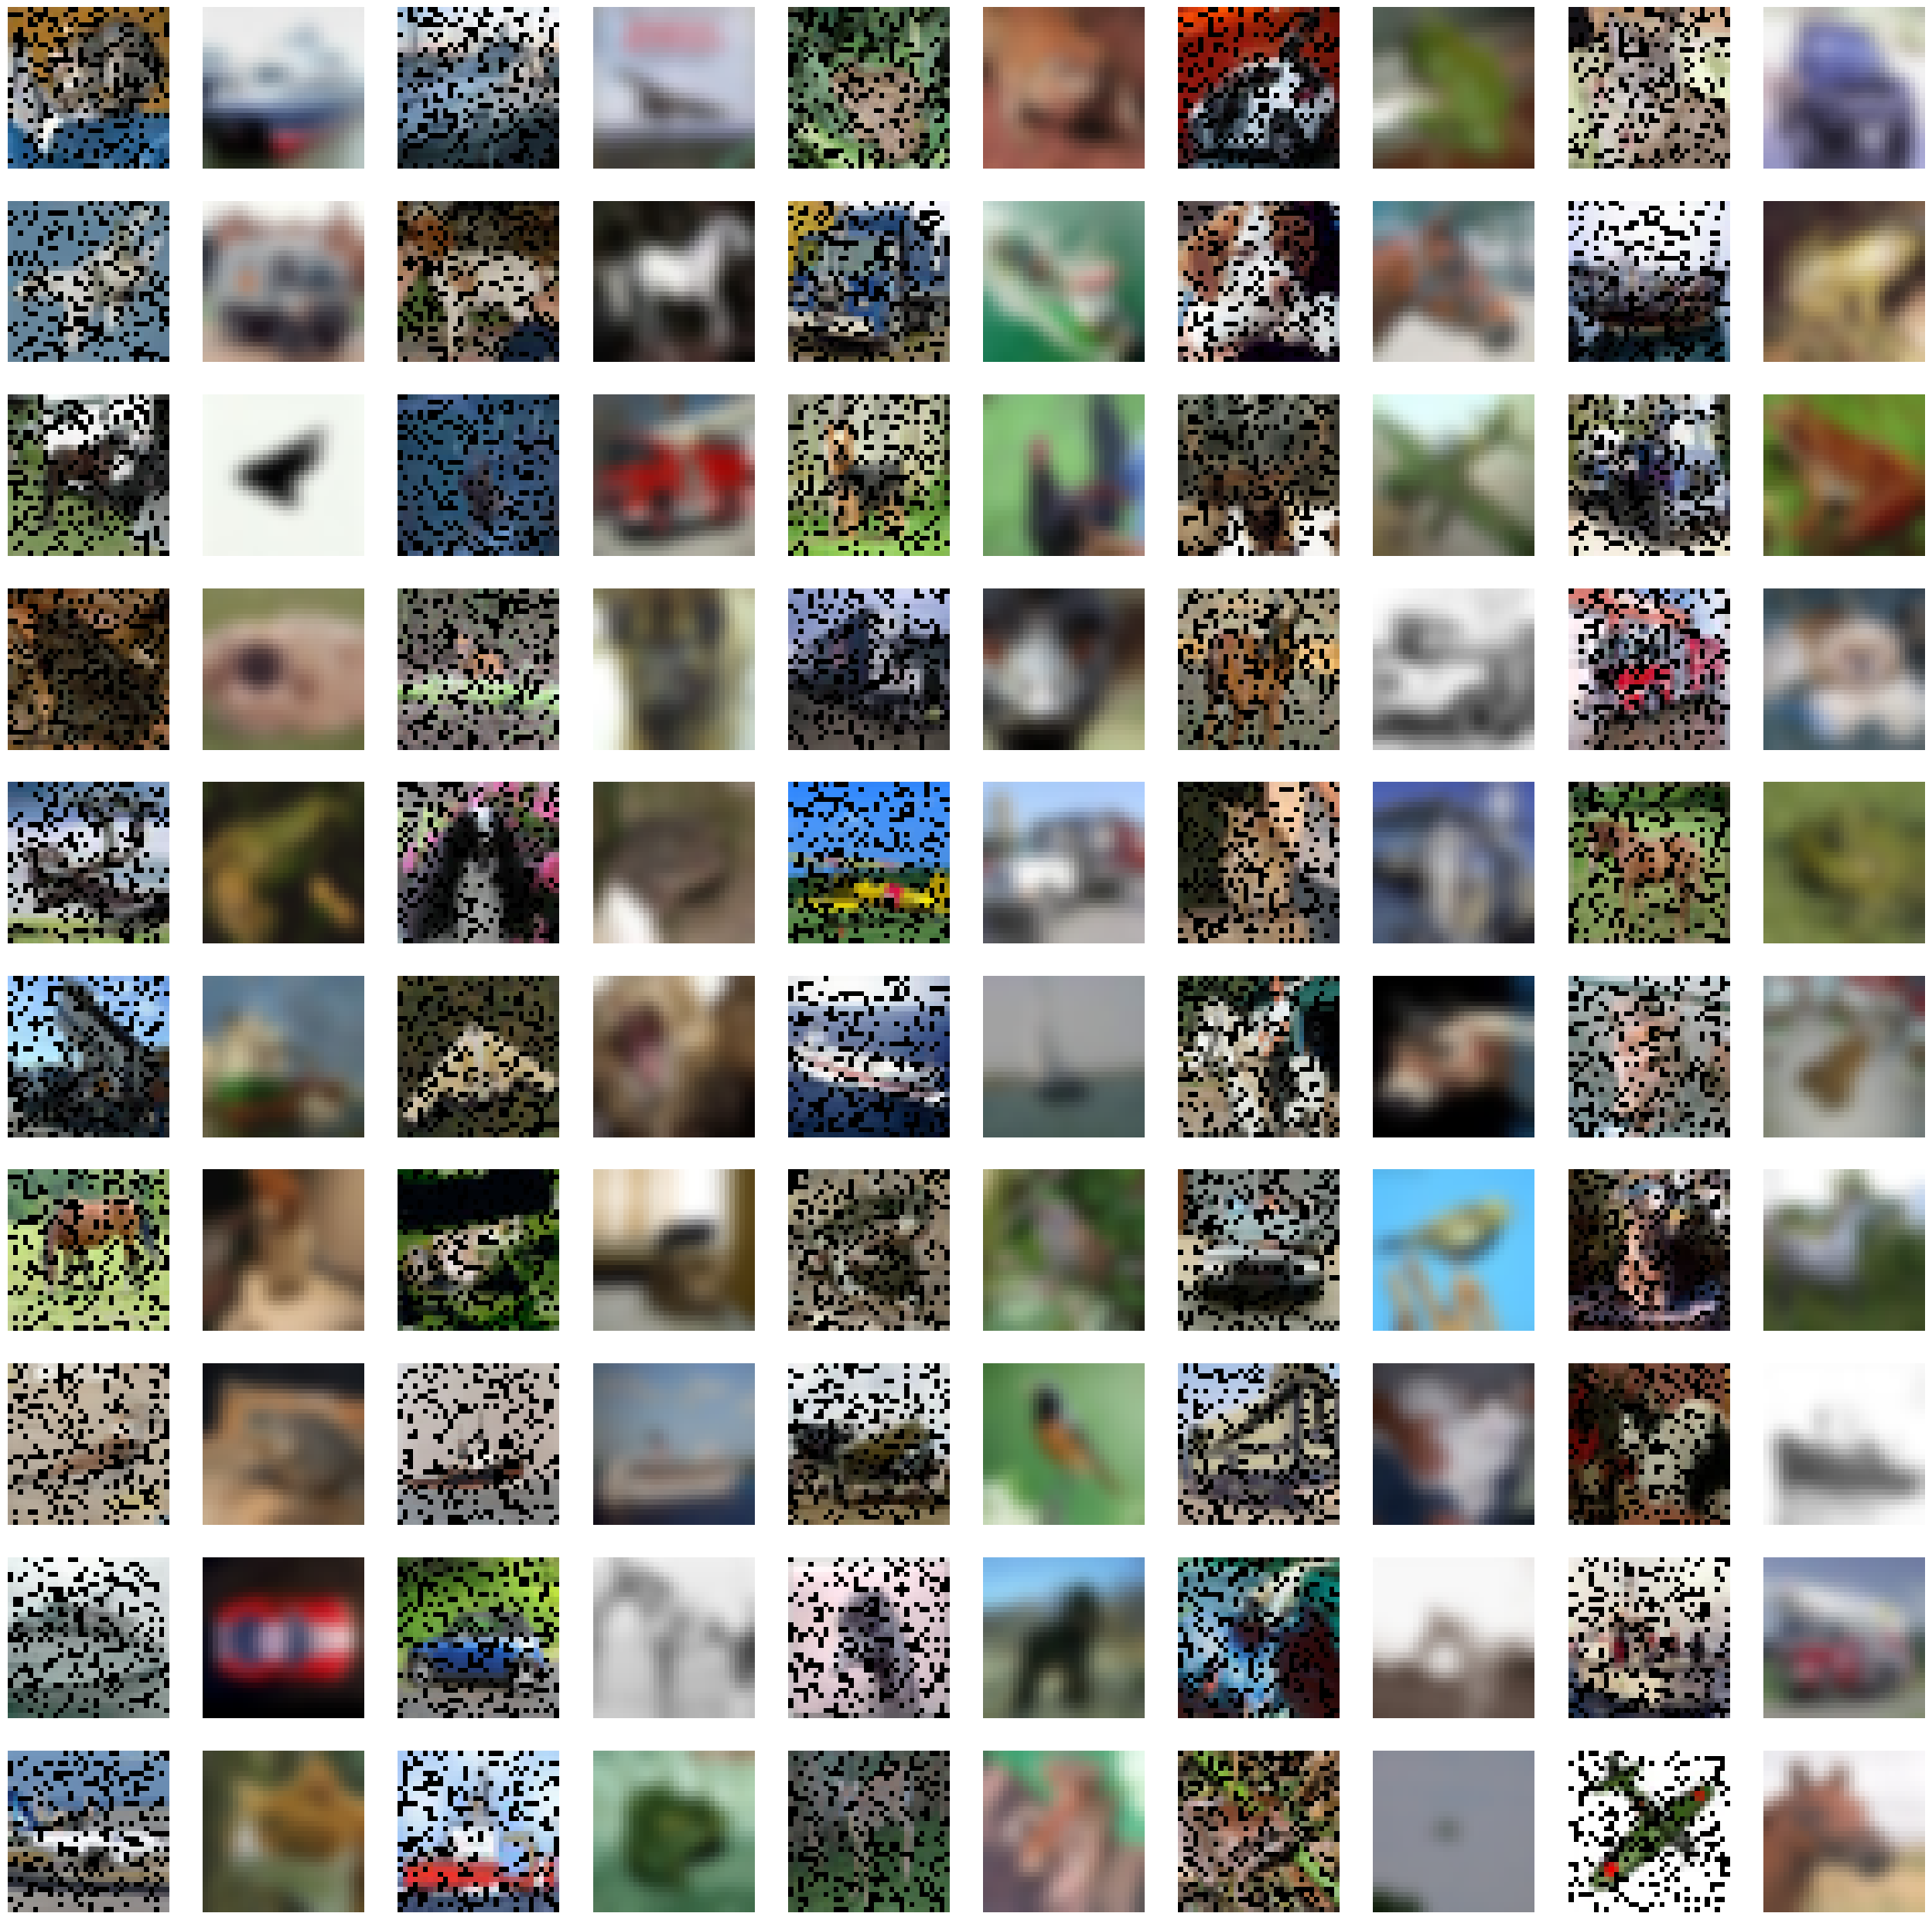

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(32, 32))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(processed_images[i].permute(1, 2, 0))
    ax.axis('off')
plt.show()

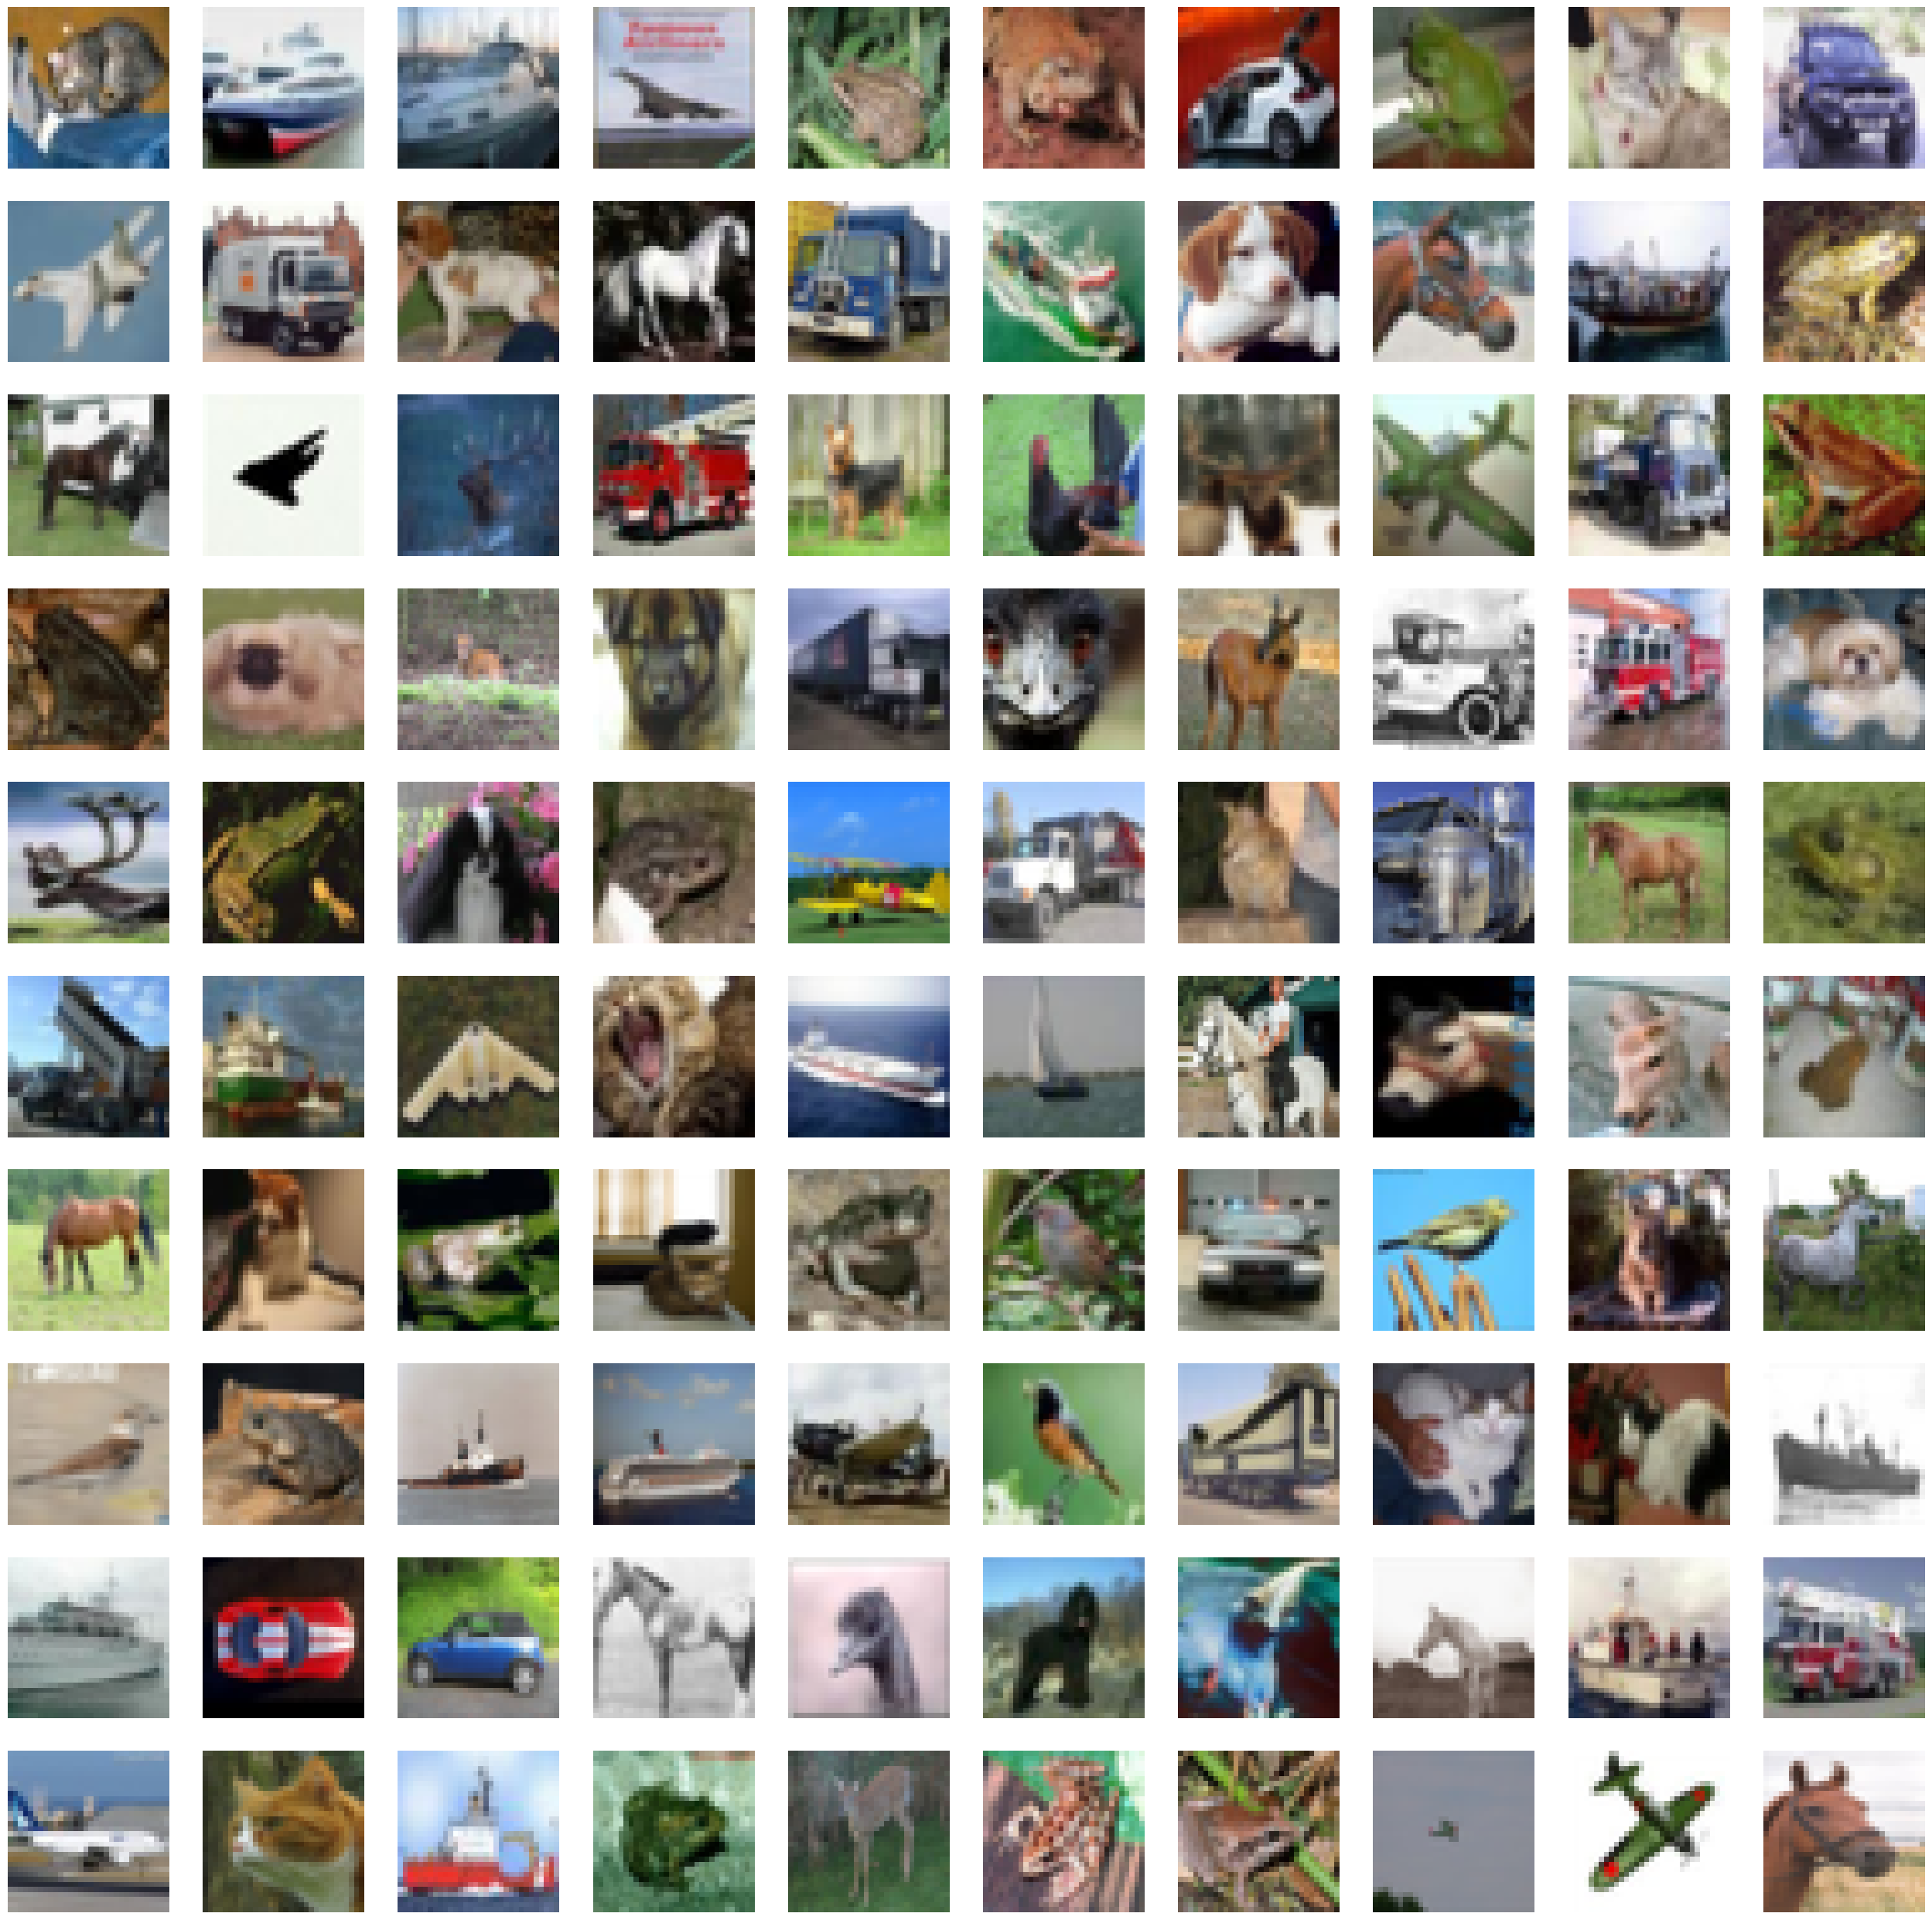

In [7]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(32, 32))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(images[i].permute(1, 2, 0))
    ax.axis('off')
plt.show()

In [8]:
import os
for idx, image in enumerate(processed_images):
    output_path = os.path.join("testing", "test", f'image_{idx:03d}.png')
    pil_image = F.to_pil_image(image)  
    pil_image.save(output_path)

In [9]:
import os
for idx, image in enumerate(images):
    output_path = os.path.join("testing", "ori", f'image_{idx:03d}.png')
    pil_image = F.to_pil_image(image)  
    pil_image.save(output_path)

In [10]:
print(labels)

tensor([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9,
        5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9,
        7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6,
        8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6,
        6, 0, 0, 7])
